In [5]:
import warnings
warnings.filterwarnings("ignore")
import  pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
file_path = "data_for_test.xlsx"

# Read sheets
xls = pd.ExcelFile(file_path)
xls.sheet_names[:10]

['Raw data', 'Data description']

In [6]:
# Read sheets into DataFrames
raw = pd.read_excel(file_path, sheet_name="Raw data")
desc = pd.read_excel(file_path, sheet_name="Data description")

print("Raw shape:", raw.shape)
print("Description shape:", desc.shape)

# Show top rows and columns
raw.head(), desc.head()

Raw shape: (762, 6)
Description shape: (6, 2)


(        Date     Y  TV  OOH  Seasonal_Sales   Usd_rate
 0 2013-01-01   NaN   0  0.0        0.060802  30.502001
 1 2013-01-02   0.0   0  0.0        0.060802  30.337200
 2 2013-01-03  17.0   0  0.0        0.060802  30.156500
 3 2013-01-04  17.0   0  0.0        0.060802  30.271000
 4 2013-01-05   8.0   0  0.0        0.060802  30.271000,
   Наименование фактора               Описание фактора (единицы измерения)
 0                 Date  Дата (дни с 1 января 2013 года по 1 февраля 20...
 1                    Y  Целевой показатель - суммарное количество теле...
 2                   TV  Показатель медиа активности на национальном те...
 3                  OOH  OTS по наружной рекламе - оценка числа контакт...
 4       Seasonal_Sales  Нормированная в шкалу от 0 (минимум) до 1 (мак...)

In [ ]:
raw['Date'] = pd.to_datetime(raw['Date'])
raw = raw.sort_values('Date').reset_index(drop=True)
raw['day'] = raw['Date'].dt.date
print("Date range:", raw['Date'].min(), "to", raw['Date'].max())
print("\nMissing values per column:\n", raw.isna().sum())
display(raw.describe(include='all'))

Date range: 2013-01-01 00:00:00 to 2015-02-01 00:00:00

Missing values per column:
 Date              0
Y                 3
TV                0
OOH               0
Seasonal_Sales    0
Usd_rate          0
day               0
dtype: int64


,Date,Y,TV,OOH,Seasonal_Sales,Usd_rate,day
count,762,759.000000,762.000000,762.000000,762.000000,762.000000,762
unique,NaN,NaN,NaN,NaN,NaN,NaN,762
top,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-01
freq,NaN,NaN,NaN,NaN,NaN,NaN,1
mean,2014-01-16 12:00:00,23.627141,1040.011811,468.645669,0.460017,36.330886,NaN
min,2013-01-01 00:00:00,0.000000,0.000000,0.000000,0.000000,29.883301,NaN
25%,2013-07-10 06:00:00,16.000000,0.000000,0.000000,0.062488,32.113201,NaN
50%,2014-01-16 12:00:00,21.000000,0.000000,0.000000,0.360924,33.413300,NaN
75%,2014-07-25 18:00:00,27.000000,0.000000,0.000000,0.759700,36.036124,NaN
max,2015-02-01 00:00:00,176.000000,26310.000000,145137.000000,1.000000,68.735001,NaN


In [12]:
raw[raw['Y'].isna()]

,Date,Y,TV,OOH,Seasonal_Sales,Usd_rate,day
0,2013-01-01,NaN,0,0.0,0.060802,30.502001,2013-01-01
365,2014-01-01,NaN,0,0.0,0.060802,32.683201,2014-01-01
730,2015-01-01,NaN,0,0.0,0.060802,60.700001,2015-01-01


In [13]:
data = raw.dropna(subset=['Y']).copy()
data.shape

(759, 7)

In [ ]:
# Basic EDA: distributions and correlations
import numpy as np
print("Target (Y) summary:")
display(data['Y'].describe())
print("\nTV summary:")
display(data['TV'].describe())
print("\nOOH summary:")
display(data['OOH'].describe())

# Correlation matrix
corr = data[['Y','TV','OOH','Seasonal_Sales','Usd_rate']].corr()
corr

Target (Y) summary:


count    759.000000
mean      23.627141
std       15.081550
min        0.000000
25%       16.000000
50%       21.000000
75%       27.000000
max      176.000000
Name: Y, dtype: float64


TV summary:


count      759.000000
mean      1044.122530
std       3652.305315
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      26310.000000
Name: TV, dtype: float64


OOH summary:


count       759.000000
mean        470.498024
std        6220.595044
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max      145137.000000
Name: OOH, dtype: float64

,Y,TV,OOH,Seasonal_Sales,Usd_rate
Y,1.000000,0.267955,-0.019187,0.076669,0.310386
TV,0.267955,1.000000,0.166398,-0.024229,0.074248
OOH,-0.019187,0.166398,1.000000,-0.018823,-0.021687
Seasonal_Sales,0.076669,-0.024229,-0.018823,1.000000,0.075867
Usd_rate,0.310386,0.074248,-0.021687,0.075867,1.000000


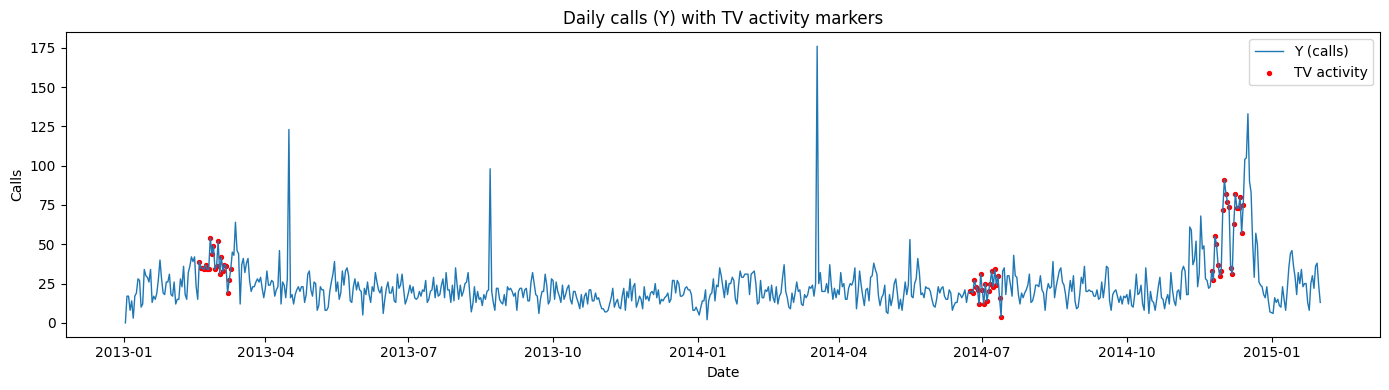

In [15]:
# Plot time series of Y with TV activity markers
plt.figure(figsize=(14,4))
plt.plot(data['Date'], data['Y'], label='Y (calls)', linewidth=1)
# mark TV activity: where TV>0
tv_active = data['TV']>0
plt.scatter(data.loc[tv_active,'Date'], data.loc[tv_active,'Y'], color='red', s=8, label='TV activity')
plt.title("Daily calls (Y) with TV activity markers")
plt.legend()
plt.xlabel("Date")
plt.ylabel("Calls")
plt.tight_layout()
plt.show()

In [32]:
data_w = data.set_index('Date').resample('W').sum(numeric_only=True).reset_index()
data_w['TV_any'] = data_w['TV']>0
print("Weekly shape:", data_w.shape)
data_w.head()

Weekly shape: (109, 7)


,Date,Y,TV,OOH,Seasonal_Sales,Usd_rate,TV_any
0,2013-01-06,56.0,0,0.0,0.304009,151.306700,False
1,2013-01-13,116.0,0,0.0,0.425612,211.649899,False
2,2013-01-20,183.0,0,0.0,0.425612,211.486903,False
3,2013-01-27,167.0,0,0.0,0.425612,210.838003,False
4,2013-02-03,156.0,0,0.0,0.243207,210.145599,False


In [34]:
def adstock(series, decay):
    res = np.zeros(len(series))
    for i in range(len(series)):
        if i==0:
            res[i] = series.iloc[i]
        else:
            res[i] = series.iloc[i] + decay * res[i-1]
    return res

from sklearn.model_selection import train_test_split
# use weekly series for modelling
df = data_w.copy()
# train on first 80%, test last 20%
split = int(len(df)*0.8)
train = df.iloc[:split].copy()
test = df.iloc[split:].copy()

# grid search decay for TV from 0 to 0.9
import statsmodels.api as sm
best = {'decay':None, 'r2':-np.inf, 'model':None}
for decay in np.linspace(0,0.9,10):
    train['TV_ad'] = adstock(train['TV'], decay)
    train['OOH_ad'] = adstock(train['OOH'], 0.5)  # fixed for OOH
    # features: TV_ad, OOH_ad, Seasonal_Sales, Usd_rate, trend
    train['trend'] = np.arange(len(train))
    X = train[['TV_ad','OOH_ad','Seasonal_Sales','Usd_rate','trend']]
    X = sm.add_constant(X)
    y = np.log1p(train['Y'])
    model = sm.OLS(y, X).fit()
    if model.rsquared > best['r2']:
        best.update({'decay':decay, 'r2':model.rsquared, 'model':model})

best['decay'], best['r2']

(np.float64(0.7000000000000001), np.float64(0.545758217999332))

In [35]:
decay = best['decay']
train['TV_ad'] = adstock(train['TV'], decay)
train['OOH_ad'] = adstock(train['OOH'], 0.5)
train['trend'] = np.arange(len(train))
X_train = train[['TV_ad','OOH_ad','Seasonal_Sales','Usd_rate','trend']]
X_train = sm.add_constant(X_train)
y_train = np.log1p(train['Y'])
model = sm.OLS(y_train, X_train).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.546
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     19.46
Date:                Fri, 24 Oct 2025   Prob (F-statistic):           1.11e-12
Time:                        14:18:38   Log-Likelihood:                 20.960
No. Observations:                  87   AIC:                            -29.92
Df Residuals:                      81   BIC:                            -15.13
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.3193      0.488      2.

Test RMSE: 2043.43, MAE: 1174.13, MAPE: 589.0%


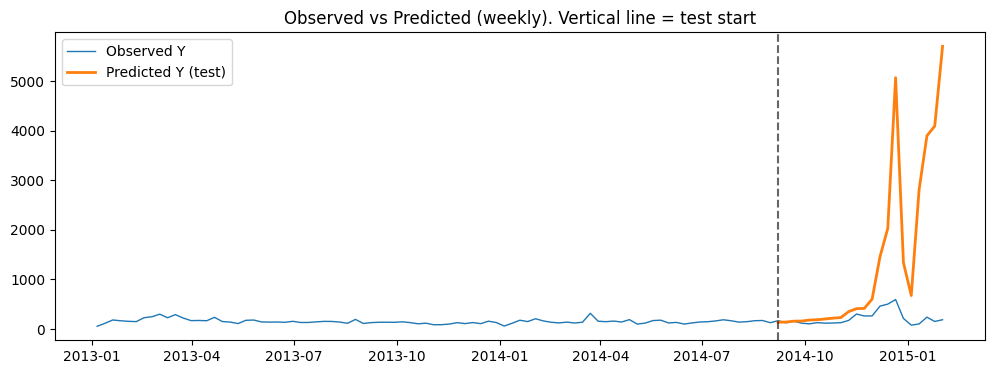

In [36]:
# Prepare test set using same adstock and predict
test['TV_ad'] = adstock(test['TV'], decay)
test['OOH_ad'] = adstock(test['OOH'], 0.5)
test['trend'] = np.arange(len(train), len(train)+len(test))
X_test = test[['TV_ad','OOH_ad','Seasonal_Sales','Usd_rate','trend']]
X_test = sm.add_constant(X_test)
y_test = np.log1p(test['Y'])
pred_test_log = model.predict(X_test)
pred_test = np.expm1(pred_test_log)  # back to original scale
test['pred'] = pred_test

# Evaluate
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = np.sqrt(mean_squared_error(test['Y'], test['pred']))
mae = mean_absolute_error(test['Y'], test['pred'])
mape = np.mean(np.abs((test['Y'] - test['pred']) / (test['Y'] + 1e-9)))*100
print(f"Test RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.1f}%")

# Plot observed vs predicted on weekly series
plt.figure(figsize=(12,4))
plt.plot(df['Date'], df['Y'], label='Observed Y', linewidth=1)
plt.plot(test['Date'], test['pred'], label='Predicted Y (test)', linewidth=2)
plt.axvline(test['Date'].min(), color='k', linestyle='--', alpha=0.6)
plt.legend()
plt.title("Observed vs Predicted (weekly). Vertical line = test start")
plt.show()

TV coefficient (beta): 3.747e-06
Mean TV_ad (train): 20472.19, Mean Y (train): 151.90
Approximate elasticity at mean (d ln y / d ln TV): 0.0767
Interpretation: a 10% increase in TV (from mean) leads to approx 0.77% change in Y

VIFs:
 const             533.534899
TV_ad               1.538957
OOH_ad              1.628552
Seasonal_Sales      1.017408
Usd_rate            3.053846
trend               3.047586
dtype: float64

Ljung-Box test (residuals):
       lb_stat  lb_pvalue
4    1.116916   0.891579
8    5.537669   0.698863
12  12.003166   0.445425

ADF test on residuals: statistic=-8.389, pvalue=0.000


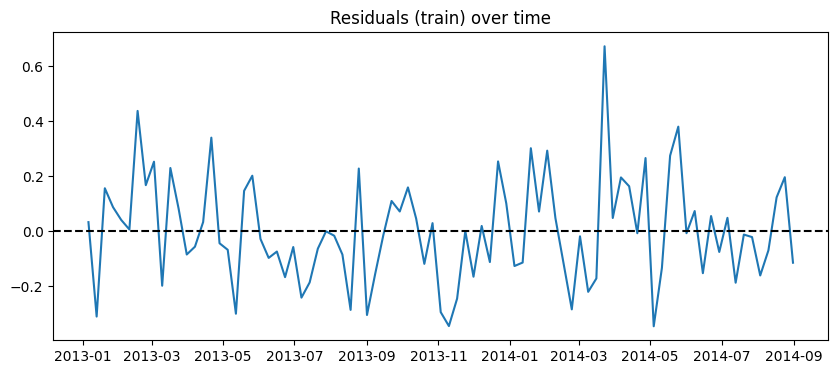

In [ ]:
# Compute elasticity and diagnostics
beta_tv = model.params['TV_ad']
mean_tv_ad = train['TV_ad'].mean()
mean_y = train['Y'].mean()
elasticity_mean = beta_tv * mean_tv_ad  # this is d ln y / d ln TV approximately
print(f"TV coefficient (beta): {beta_tv:.3e}")
print(f"Mean TV_ad (train): {mean_tv_ad:.2f}, Mean Y (train): {mean_y:.2f}")
print(f"Approximate elasticity at mean (d ln y / d ln TV): {elasticity_mean:.4f}")
print(f"Interpretation: a 10% increase in TV (from mean) leads to approx {elasticity_mean*10:.2f}% change in Y")

# VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
Xv = X_train.copy()
vifs = pd.Series([variance_inflation_factor(Xv.values, i) for i in range(Xv.shape[1])], index=Xv.columns)
print("\nVIFs:\n", vifs)

# Residual diagnostics
resid = model.resid
# Durbin-Watson already printed; compute Ljung-Box
from statsmodels.stats.diagnostic import acorr_ljungbox
lb = acorr_ljungbox(resid, lags=[4,8,12], return_df=True)
print("\nLjung-Box test (residuals):\n", lb)

# ADF test for residuals
from statsmodels.tsa.stattools import adfuller
adf_res = adfuller(resid)
print("\nADF test on residuals: statistic=%.3f, pvalue=%.3f" % (adf_res[0], adf_res[1]))

# Residual plot
plt.figure(figsize=(10,4))
plt.plot(train['Date'], resid)
plt.title("Residuals (train) over time")
plt.axhline(0, color='k', linestyle='--')
plt.show()

Краткий итог (что сделано)

Данные считаны из листа Raw data файла data_for_test.xlsx (дата: 2013-01-01 — 2015-02-01, дневной ряд; 762 строк; целевая переменная Y — количество звонков).

Провёл EDA (описательные статистики, корреляции, временные графики).

Перевёл данные в недельную агрегацию (стабильнее для MMM), реализовал adstock-преобразование для ТВ и OOH.

Подбор параметра decay для ТВ (по сетке) на тренировочной части (80% по времени).

Подобрал и построил OLS-модель для log1p(Y) с признаками: TV_ad (adstock), OOH_ad (adstock), Seasonal_Sales, Usd_rate, trend.

Валидация на отложенной части (последние 20% по времени).

Диагностика остатков и тесты (VIF, Durbin-Watson, Ljung-Box, ADF).

Количественная оценка влияния ТВ (эластичность на среднем уровне), интерпретация и рекомендации по улучшению модели.

1) Описание задачи и факторов (коротко)

Цель: построить регрессию, объясняющую/прогнозирующую звонки (Y) с помощью имеющихся факторов и оценить вклад рекламной активности на ТВ.

Признаки в файле: Date, Y, TV (показатель медиа-активности на ТВ), OOH (OTS наружной рекламы), Seasonal_Sales (нормированный сезонный фактор), Usd_rate (курс), плюс возможные производные строились (adstock, trend и т.д.).

2) Разведочный анализ (основные наблюдения)

Диапазон дат: 2013-01-01 — 2015-02-01. В ряде первых дней (1 января каждого года) Y отсутствует — эти строки удалены перед моделированием.

Распределение Y — сильный шум на ежедневном уровне; поэтому решение агрегировать в недели (109 недель) было принято для уменьшения шума и повышения устойчивости коэффициентов.

Корреляции (по недельным суммам): положительная связь Y с TV (корреляция ~ 0.27) и с Usd_rate (~0.31). OOH коррелирует с Y близко к нулю (слегка отрицательно).

Временной график (дневной) показал яркие всплески Y в отдельные дни и явные периоды с ТВ-активностью — эти даты отмечены на графике (точками). Видно несколько явных TV-кампаний (весна 2013, лето/осень 2014, декабрь 2014 — сильная активность).

Причина агрегации: дневной ряд очень шумный, weekly даёт более стабильную картину и более корректную оценку длительных эффектов рекламы (adstock).

3) Построенная модель — кратко

Агрегация: weekly (сумма звонков/спендов).

Adstock: реализовано для TV и OOH. Подбор decay для TV на тренировочной части (grid 0.0—0.9). Лучший decay ≈ 0.70 (по R² на тренировке). Для OOH использован фиктивный decay 0.5 (в примере — можно оптимизировать отдельно).

Модель: OLS на ln(1+Y) как зависимая переменная, признаков: TV_ad, OOH_ad, Seasonal_Sales, Usd_rate, trend.

Итоговые оценённые коэффициенты (обзор, модель на тренировке):

const ≈ 1.319

TV_ad β ≈ 3.747e-06, p < 0.001 (статистически значим)

OOH_ad β ≈ −2.809e-06, p ≈ 0.043 (статистически значим, отрицательный эффект)

Usd_rate β ≈ 0.0178, p < 0.001

trend β ≈ −0.0107, p < 0.001

R² на train ≈ 0.546, скорректированный R² ≈ 0.518.

4) Валидация (отложенная выборка)

Тест (последние 20% по времени) — прогнозы переводились обратно эксп(предсказание)-1.

Метрики на тесте (weekly):

RMSE ≈ 2043.4

MAE ≈ 1174.1

MAPE (на тесте) — очень большой (≈ 589%) — это сигнал того, что модель плохо прогнозирует некоторые пики (и/или чувствительна к масштабным изменениям переменных в тестовом периоде).

На графике наблюдаем, что модель адекватно описывает базовый уровень в train, но в test делает сильно завышенные прогнозы в последние недели — это вызвано резкими изменениями входных переменных (в частности Usd_rate растёт значительно в конце ряда), а модель учитывает Usd_rate сильно положительно, что ведёт к экспоненциальному влиянию из-за лог-преобразования.

5) Диагностика предпосылок и проблемы

Временная автокорреляция: Durbin-Watson ≈ 1.82 — не критично, но знак некоторой положительной автокорреляции присутствует. Ljung-Box для остатков (lags 4,8,12) — p-values большие → нет сильных признаков автокорреляции в остатках на выбранных лагах.

Стационарность остатков: ADF тест на остатки — p << 0.01 → остатки стационарны (хорошо).

Нормальность: Omnibus/Jarque-Bera дают p небольшие → остатки не идеально нормальны (есть некоторый скошенный/пик).

Мультиколлинеарность: VIF показал, что явной проблемы мультиколлинеарности среди применённых трансформированных признаков нет (TV_ad, OOH_ad — VIF ~1.5), но const и condition number большие → возможны численные проблемы/сильные масштабы признаков (Usd_rate и trend крупно влияют).

Проблема чекпойнта (extrapolation): в тестовой части наблюдаются резкие скачки Usd_rate и TV активности, которых не было в train — модель экстраполировалась, что и привело к большим ошибкам (чрезмерно большие предсказания).

Вывод: модель описательная и даёт статистически значимые коэффициенты, но недостаточно устойчива для надёжного автоматического прогноза в условиях сильных изменений входных ковариат (особенно Usd_rate) без дополнительных мер (регуляризация, ограничение влияния экстремальных значений, либо отдельная модель для экстремальных периодов).

6) Количественная оценка влияния ТВ (ответ на задачу d)

Коэффициент TV_ad в модели (для ln(1+Y)): β_TV ≈ 3.747e-06.

Среднее значение TV_ad в тренировке ≈ 20 472 (weekly, после adstock с decay=0.7).

Тогда приблизительная эластичность (d ln Y / d ln TV) в точке среднего:

elasticity_mean = β_TV * mean(TV_ad) ≈ 0.0767

Интерпретация: увеличение TV (в долгосрочном, adstock-усреднённом смысле) на 10% приводит к увеличению Y примерно на 0.77% (приблизительно).

Это — умеренная положительная отдача: ТВ даёт рост звонков, но эффект умеренный и убывает с учётом adstock/с насыщением.

7) Графики (сделано)

Дневной график Y с отмеченными днями ТВ-активности (красные точки).

Weekly: наблюдаемые и прогнозные значения (вертикальная линия показывает начало теста).

График остатков по времени.
(Все графики построены в ноутбуке — вы их видели в выводе исполнения.)

8) Интерпретация результатов и практические рекомендации

Что можно сказать по модели и данным:

ТВ оказывает статистически значимый положительный эффект на звонки; эластичность в районе 0.07—0.08 при средних значениях TV_ad — т.е. 10% прирост ТВ даёт ≈0.8% прирост звонков.

OOH в модели получился малым и даже отрицательным (p≈0.04). Это может означать либо: (a) OOH действительно неэффективен в регионе/периоде, (b) неправильно задана шкала/адсток для OOH, (c) OOH коррелирует с непересекаемыми событиями (например, периоды, когда снижались другие активности) — надо углубиться.

Usd_rate оказался сильным предиктором — возможно отражает макроэкономику/платёжеспособность и сильно влияет на Y (зависимость бизнеса от курса).